# Zillow Regression Project

### Project Overview

#### Within this project we will wrangle zillow data, identify significant features, and build a regression model to predict single-family home values.

### Goals
#### Create deliverables:

- READ ME
- Final Report
- wrangle.py, explore.py, and model.py files
- Acquire Zillow data from the Codeup database
- Prepare and split the data
- Explore the data and define hypotheses, running appropriate statistical tests to accept or reject each null hypothesis
- Create a baseline model in predicting home value and document the Root Mean Square Error (RMSE)
- Fit and train three regression models to predict home value on the train dataset
- Evaluate the models by comparing their performance on train and validation data
- Select the best model and evaluate it on test data subset
- Document findings, takeaways, recommendations and next steps

In [1]:
#standard imports
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

#stats
from scipy.stats import pearsonr, spearmanr, kruskal, levene
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

#my functions
import wrangle as w
import env
import model as m
import explore as e

### Data Acquisition
- Data acquired from Codeup Database
- Each row represents a single-family home located within Los Angeles, Orange, or Ventura County, California.
- Each column represents a feature of those homes

### Data Dictionary

| Feature | Definition |
| --- | --- |
| home_Value | The tax assesor appraised home value (Target)|
| bedrooms | Number of bedrooms for the home |
| bathrooms | Number of bathrooms for the home |
| sqft | Total square footage listed for a property |
| county | The county the home is located within |
| year_built | Year the home was built |

## Prepare

### Prepare Actions:
- Renamed columns to promote readability 
- Converted data types to facilitate exploration and modeling
- Removed Null values

### Feature Engineering

- Renamed the fips column and corresponding values to county and corresponding county name
- Scaled appropriate columns to increase model performance
- Removed outliers

In [2]:
# pull in dataframe and prepare for exploration
df = w.wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054022 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   home_value  float64
 4   year_built  object 
 5   yearly_tax  float64
 6   county      object 
dtypes: float64(5), object(2)
memory usage: 125.4+ MB


### Data Splitting
- Split data into train, validate, and test; a 56/24/20 split.

In [3]:
train, validate, test = w.split_zillow(df)

In [4]:
df.shape, train.shape, validate.shape, test.shape 

((2054022, 7), (1150251, 7), (492966, 7), (410805, 7))

## Exploration
### Target Variable: home_value

In [5]:
#Descriptive Statistics for target variable
round(train.home_value.describe(),2)

count    1150251.00
mean      378418.16
std       271002.04
min           23.00
25%       183979.00
50%       317024.00
75%       502789.00
max      1520905.00
Name: home_value, dtype: float64

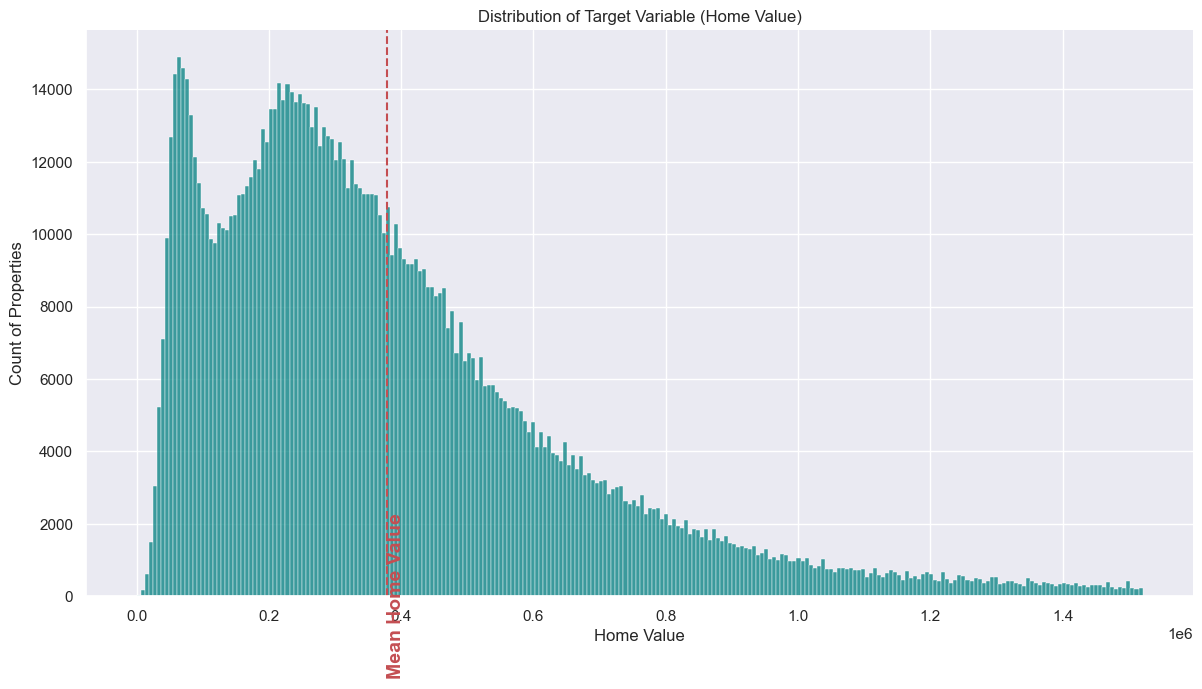

In [6]:
#Call funtion for visualization of target variable
e.target_vis(train)

### Question 1: Does county influence home value?

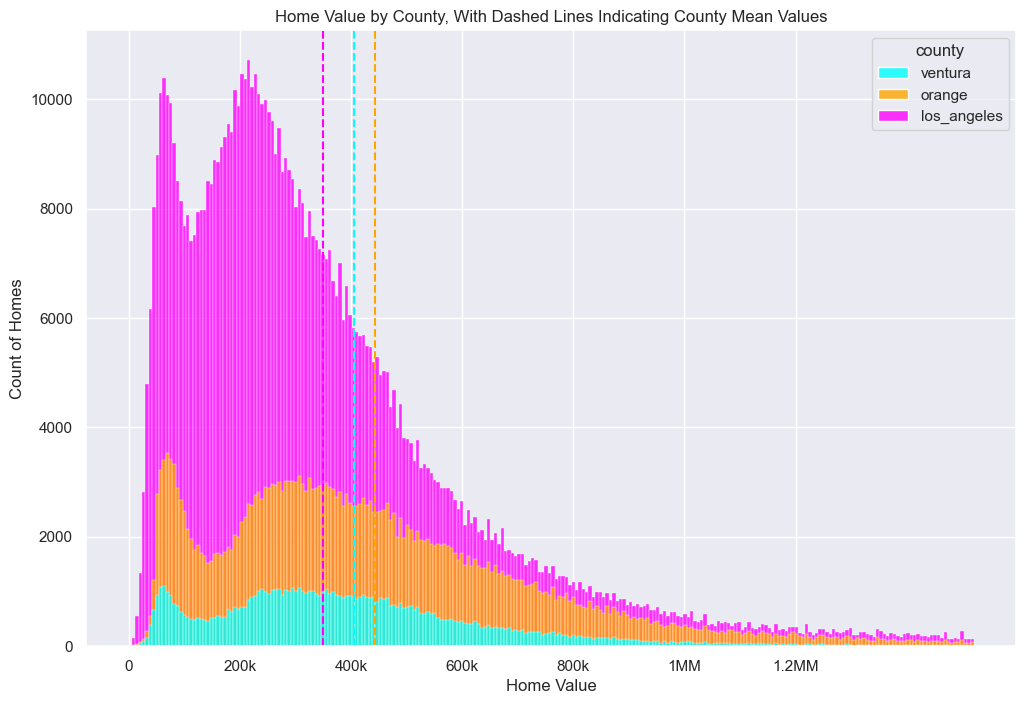

In [7]:
#get county vis
e.county_vis(train)

We can see here that LA County is the vast majority of our dataset (~66%), with a very wide range of home values, and the lowest mean home value. Ventura County has a slightly higher mean, and Orange county has the highest. 


According to Zillow, LA County has a wide range of median home values by zip code, ranging from Lancaster(93535) at 307k, to Beverly Hills(90210) at 4.2MM. 

#### Based on this information, lets perform a Kruskal-Wallis test to better understand home values as they relate to county.

H0: Median home values in LA County are similar to those in both Orange & Ventura County

Ha: Median home values in LA County are significantly different than those in both Orange & Ventura County

In [8]:
#get kruskal results
e.get_kruskal_county(train)

KruskalResult(statistic=33588.086221539284, pvalue=0.0)

Since our p value is less than our alpha of 0.05, we can reject our null hypothesis, and state with confidence that median home values in LA County are significantly different than those in both Orange & Ventura County.

## Does bedroom count singnificantly influence home value?

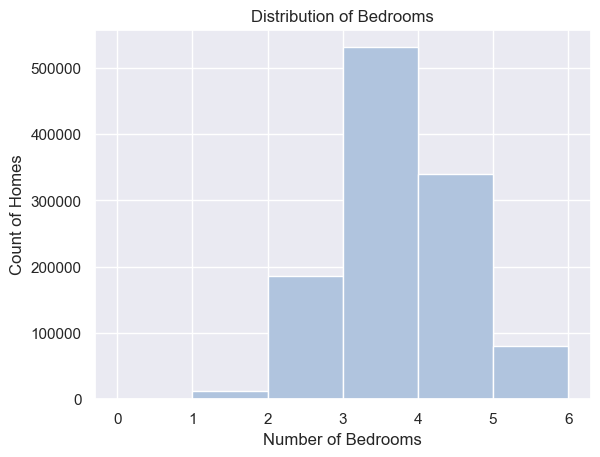

In [9]:
#call function to produce bedroom vis
e.get_hist_bedrooms(train)

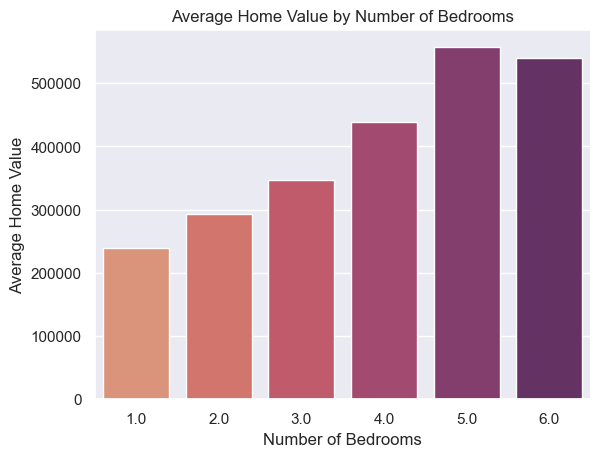

In [10]:
#call function to produce bedroom vis
e.bedroom_vis(train)

#### Lets perform a pearson r correlation test to see if there is a statistical linear correlation between home value and bedroom count

H0: There is no linear correlation between the number of bedrooms and home value.

Ha: there is a linear correlation between the number of bedrooms and home value.

In [11]:
#call pearsonr function
e.pearsonr_bedrooms(train)

Correlation: 0.25728647237362817
P-value: 0.0


Since our p-value is less than our alpha (0.05) we can reject the null hypothesis that there is no linear correlation between home value and bedroom count, and confidently state that there is a significant linear correlation between them.

## Does bathroom count singnificantly influence home value?

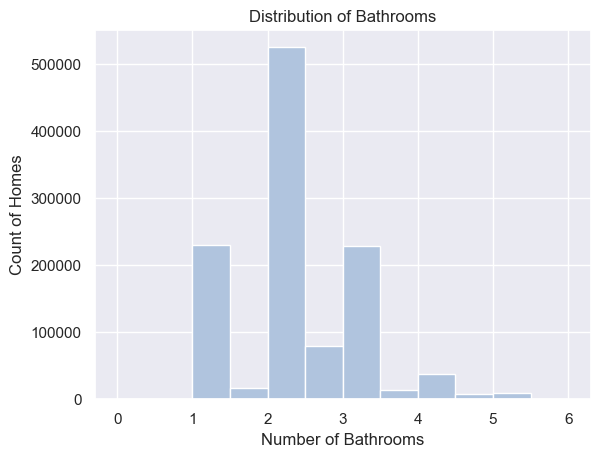

In [12]:
#call vis function
e.get_hist_bathrooms(train)

Here we se the distribution of bathroom count. 0 and 0.5 bathrooms are accounted for here, but not visible due to the extremely low amount relative to the rest of the data. For comaprison, the small sliver at 4.5 represents nearly 7600 homes, while 0 and 0.5 bathroom homes account for 511 and 7 homes, respectively.

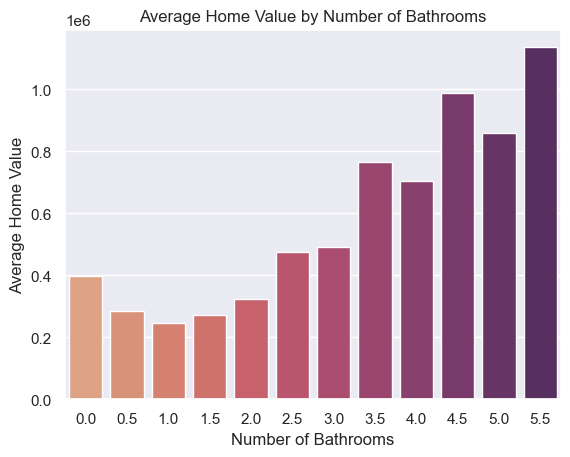

In [13]:
#call vis function
e.bathroom_vis(train)

Here we see an upward trend of average home value as bathroom count increases.

#### Lets perform a pearson r correlation test to see if there is a statistical linear correlation between home value and bathroom count

H0: There is no linear correlation between the number of bathrooms and home value.

Ha: there is a linear correlation between the number of bathrooms and home value.

In [14]:
#call function for pearson r test
e.pearsonr_bathrooms(train)

Correlation: 0.4693126147460709
P-value: 0.0


Since our p-value is less than our alpha (0.05) we can reject the null hypothesis that there is no linear correlation between home value and bathroom count, and confidently state that there is a significant linear correlation between them.

## Does square-footage singnificantly influence home value?

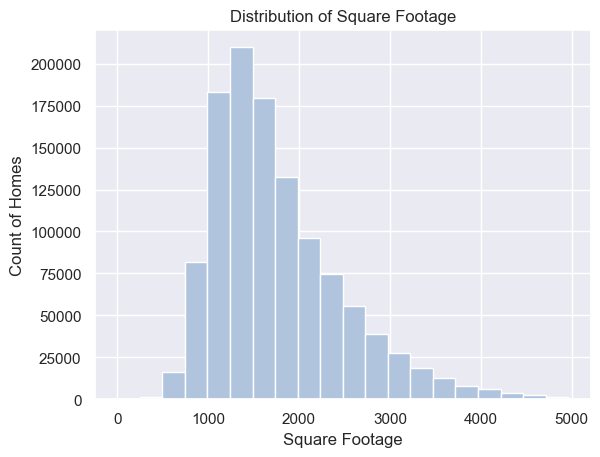

In [15]:
#call function to produce sqft vis
e.get_hist_sqft(train)

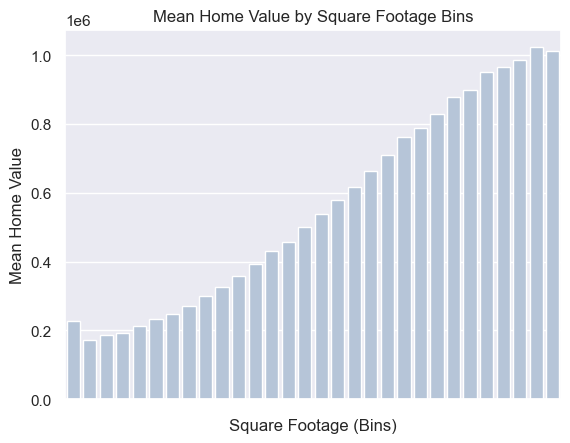

In [16]:
#call function to produce sqft vis
e.sqft_vis(train)

Here we see an upward trend of mean home value as square footage increases. 

#### Lets perform a pearson r correlation test to see if there is a statistical linear correlation between home value and square footage

H0: There is no linear correlation between square footage and home value.

Ha: there is a linear correlation between square footage and home value.

In [17]:
#call function to produce pearsonr test
e.pearsonr_sq_ft(train)

Pearson correlation coefficient: 0.5472436094734336
P-value: 0.0


Since our p-value is less than our alpha (0.05) we can reject the null hypothesis that there is no linear correlation between home value and square footage, and confidently state that there is a significant linear correlation between them.

## Exploration Summary

- each feature we explored has a significant influence on home value

- we will move location, square footage, bedroom and bathroom count into modeling

### Features not taken into modeling:

- yearly_tax : this value is calculated based on the home value, so that information would not be available to us when trying to use this model in the future when we try to predict home values 

- year built : while this feature may certainly weigh on home value, I feel less confident taking this into modeling, because the maintance of each individual home could severly impact the home value as it ages, and level of maintenance is data we do not have

## Modeling
#### Goal:
- Develop several regression models utilizing features in this dataset
- Evaluate models based on Root Mean Squared Error (RMSE)
- Select the model that best predicts home value

In [18]:
#save features into a list and reset train, validate, test
features = ['home_value','county', 'bedrooms', 'bathrooms', 'sqft']
train, validate, test = w.driver_sets(train, validate, test, features)

### Prep for modeling
- I scaled appropriate drivers using the minmax scaler
- Split the data with home_value as the target

In [19]:
#prepare data for modeling, split to x, y; train, validate, test
X_train, y_train, X_validate, y_validate, X_test, y_test = w.prep_for_model(train, validate, test, 'home_value')

### Baseline models
- Lets look at both mean and median baseline model.

In [20]:
#call function for baseline model
m.baseline_models(y_train, y_validate)

,model,RMSE_train,RMSE_validate,Delta
0,mean_baseline,271001.921201,271113.033701,-111.1125
1,median_baseline,277869.184448,277994.421648,-125.2372


Mean baseline performed better on train and validate sets

## Model Comparison

In [21]:
#call functions for my regression models
m.get_lars(X_train, y_train, X_validate, y_validate)
m.get_tweedie(X_train, y_train, X_validate, y_validate)
m.get_linreg(X_train, y_train, X_validate, y_validate)

RMSE for Lasso + Lars
Training/In-Sample:  223775.5547136981 
Validation/Out-of-Sample:  223779.66834026665
RMSE for GLM using Tweedie, power=2 & alpha=1
Training/In-Sample:  266964.88021309377 
Validation/Out-of-Sample:  267101.4723203998
RMSE for OLS using LinearRegression
Training/In-Sample:  223504.4947659247 
Validation/Out-of-Sample:  223509.20031747853


### Modeling Takeaways:
- All models performed better than the baseline
- The RMSE for OLS was the lowest at 223504
- Because of this RMSE score and the low RMSE delta between train and validate set, I will proceed with this model on my test set.

In [22]:
#call function for OLS on test set
m.get_test(X_train, y_train, X_test, y_test)

RMSE for OLS using LinearRegression
Test-Sample:  223669.60974552645


## Conclusion

- Our test data results were similar to train and validate

- The OLS model has improved the accuracy of the predictions by reducing the error from the baseline by almost 18%.

## Recommendations

- If deeper location data were available like zip code for example, we could have much stronger of a location driver than just county

## Next Steps

- With more time, I would like to do more feature engineering, run addiitonal regression models, and explore the original database futher to see what features can be added